In [15]:
# packages 

# standard
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Machine Learning
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [24]:
# import data
df = pd.read_excel('Data/Rice.xlsx', sheet_name='Rice_Osmancik_Cammeo_Dataset')
df.head()

Area   Perimeter  MajorAxisLength  MinorAxisLength  Eccentricity  \
0  15231  525.578979       229.749878        85.093788      0.928882   
1  14656  494.311005       206.020065        91.730972      0.895405   
2  14634  501.122009       214.106781        87.768288      0.912118   
3  13176  458.342987       193.337387        87.448395      0.891861   
4  14688  507.166992       211.743378        89.312454      0.906691   

   ConvexArea    Extent   Class  
0       15617  0.572896  Cammeo  
1       15072  0.615436  Cammeo  
2       14954  0.693259  Cammeo  
3       13368  0.640669  Cammeo  
4       15262  0.646024  Cammeo

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             3810 non-null   int64  
 1   Perimeter        3810 non-null   float64
 2   MajorAxisLength  3810 non-null   float64
 3   MinorAxisLength  3810 non-null   float64
 4   Eccentricity     3810 non-null   float64
 5   ConvexArea       3810 non-null   int64  
 6   Extent           3810 non-null   float64
 7   Class            3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.3+ KB


In [26]:
# target
df.Class.value_counts()

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64

In [27]:
# basic stats for numerical features
features_num = ['Area', 'MajorAxisLength', 'MinorAxisLength', 
                'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']

df[features_num].describe()

Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count   3810.000000      3810.000000      3810.000000   3810.000000   
mean   12667.727559       188.776222        86.313750      0.886871   
std     1732.367706        17.448679         5.729817      0.020818   
min     7551.000000       145.264465        59.532406      0.777233   
25%    11370.500000       174.353855        82.731695      0.872402   
50%    12421.500000       185.810059        86.434647      0.889050   
75%    13950.000000       203.550438        90.143677      0.902588   
max    18913.000000       239.010498       107.542450      0.948007   

         ConvexArea       Extent    Perimeter  
count   3810.000000  3810.000000  3810.000000  
mean   12952.496850     0.661934   454.239180  
std     1776.972042     0.077239    35.597081  
min     7723.000000     0.497413   359.100006  
25%    11626.250000     0.598862   426.144753  
50%    12706.500000     0.645361   448.852493  
75%    14284.000000     0.726562   483.683746  
max    19099.000000     0.861050   548.445984

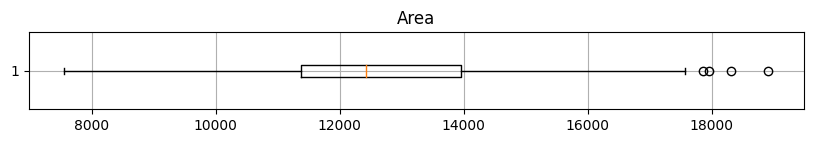

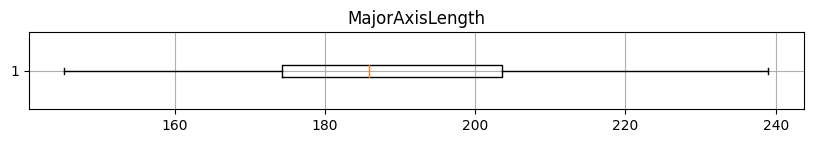

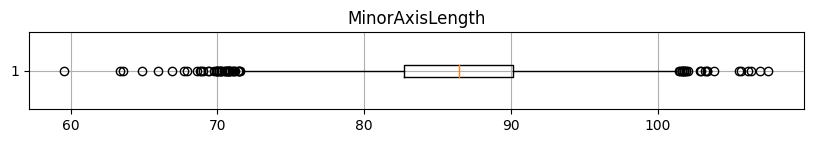

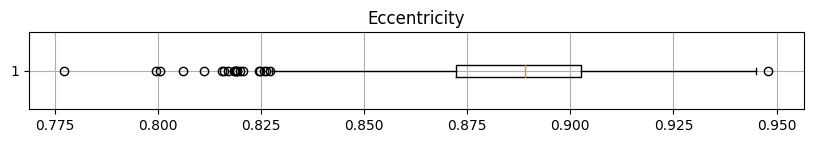

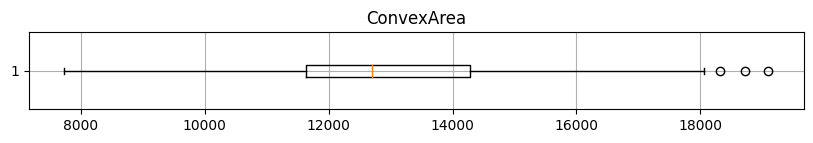

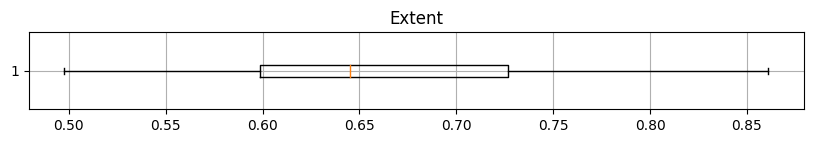

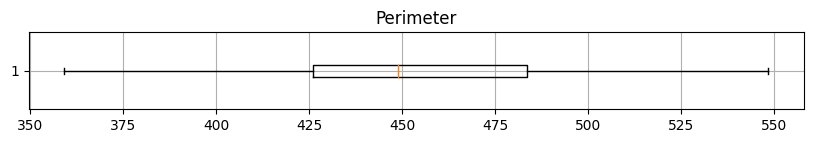

In [28]:
# boxplots of all features
for f in features_num:
    plt.figure(figsize=(10,1))
    plt.boxplot(x=df[f], vert=False)
    plt.title(f)
    plt.grid()
    plt.show()

# Feature Correlations



## pairwise scatterplot, representing Class by color

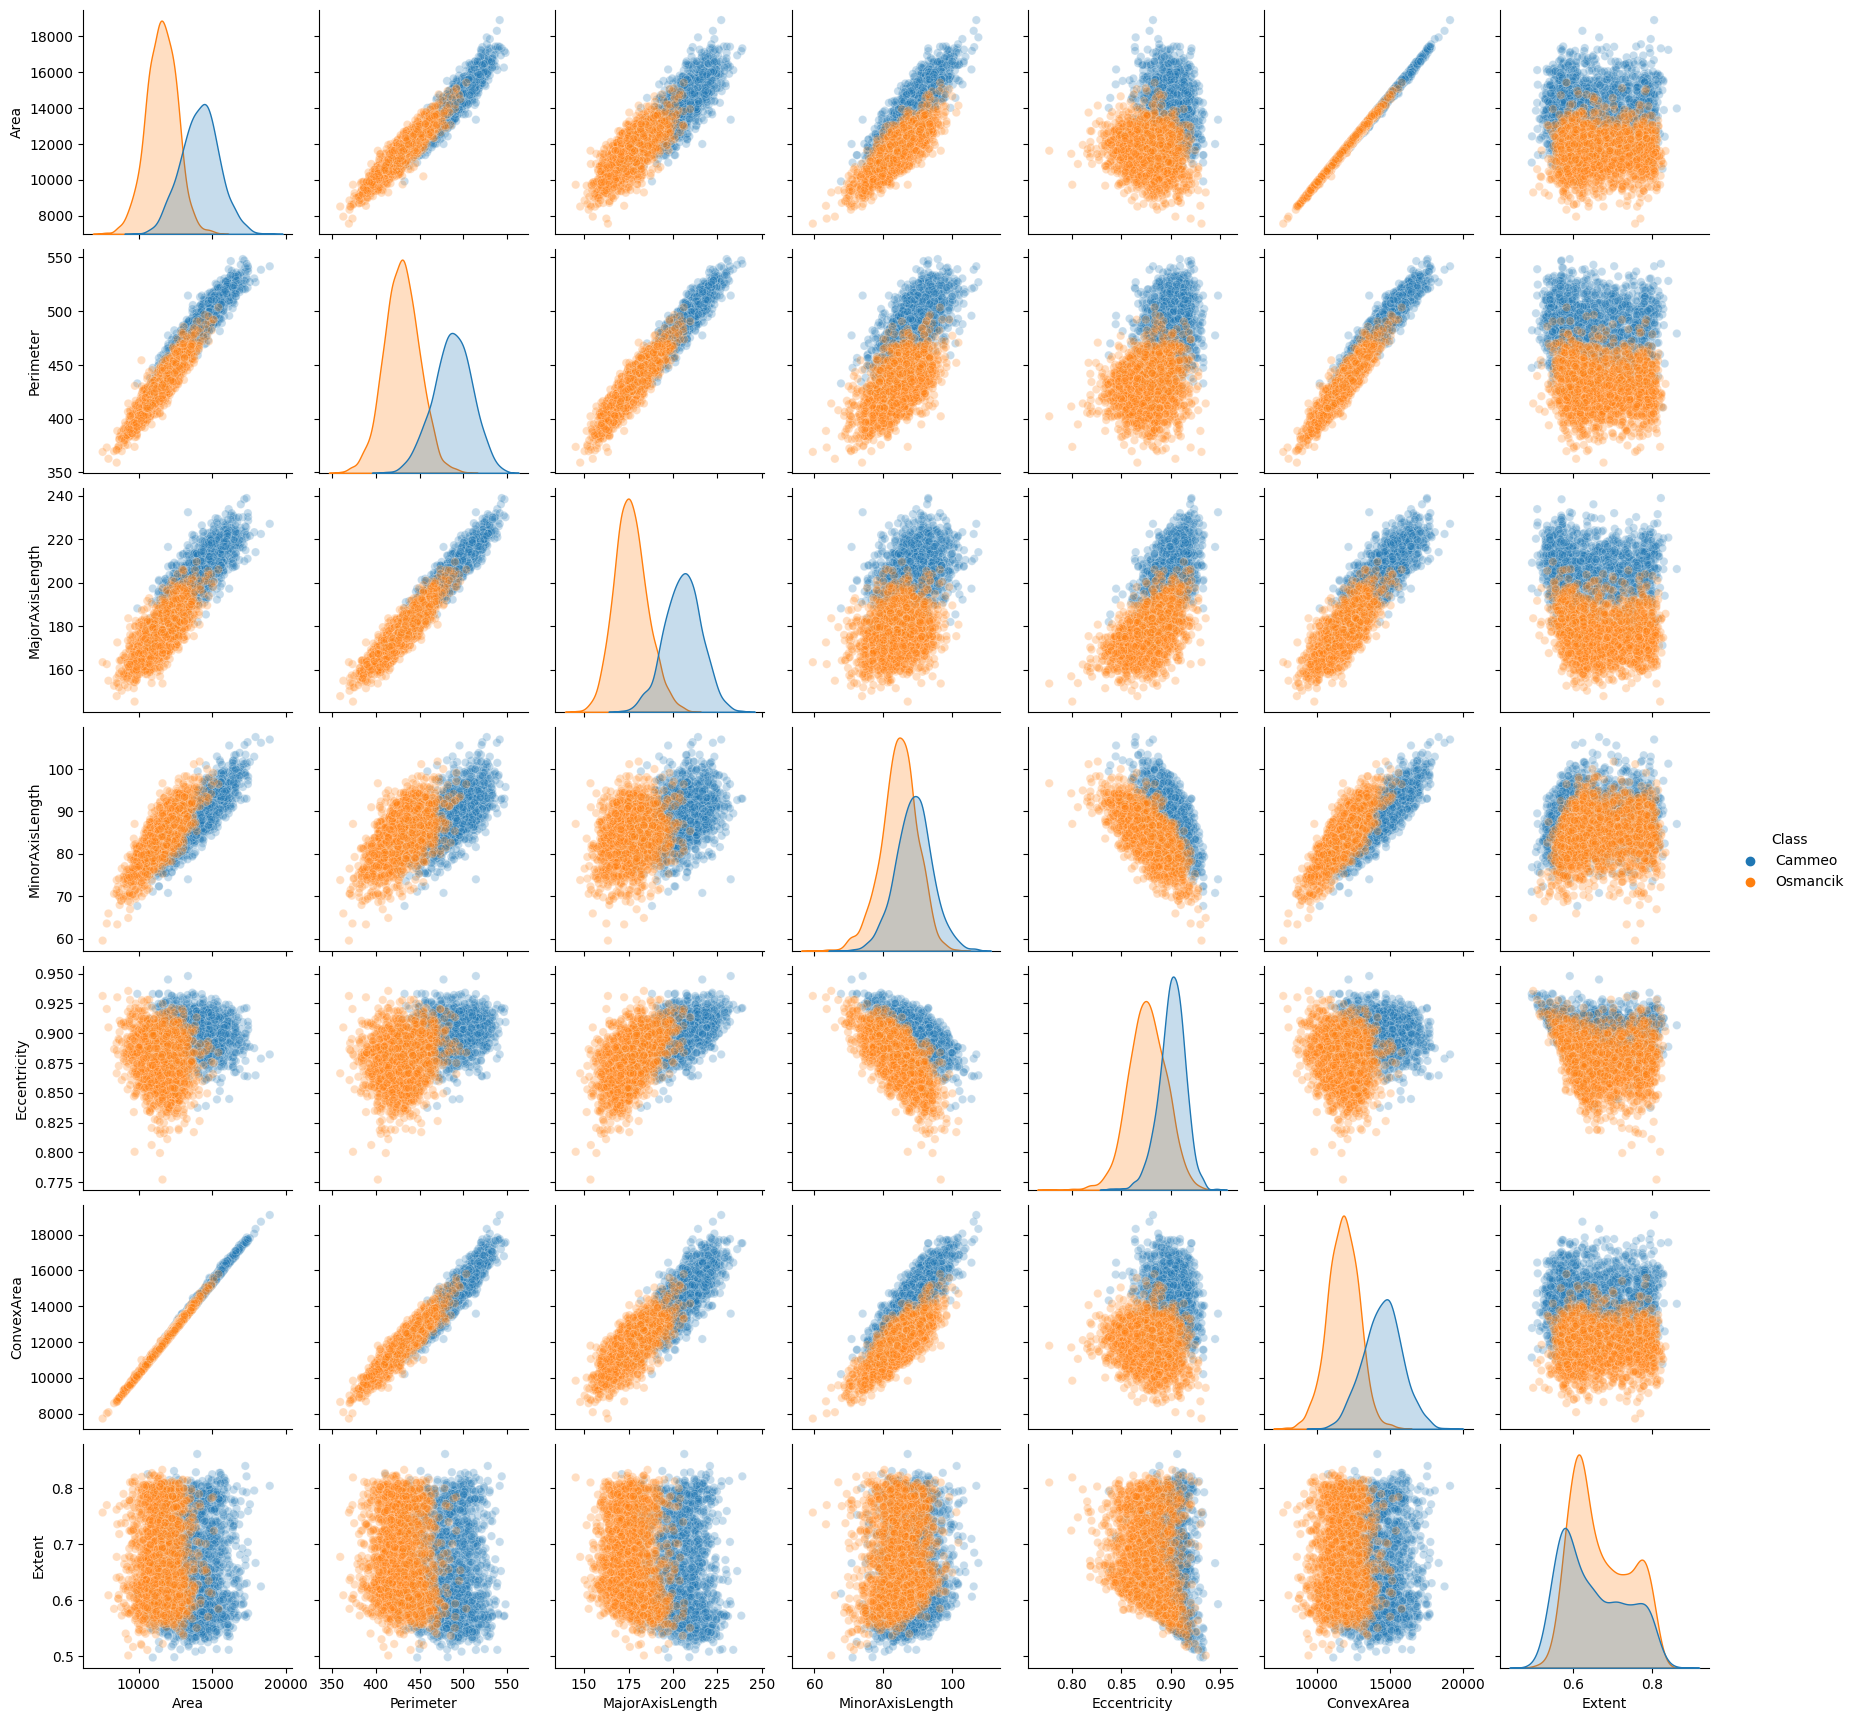

In [29]:
sns.pairplot(df, hue='Class',
             plot_kws = {'alpha' : 0.25})
plt.show()

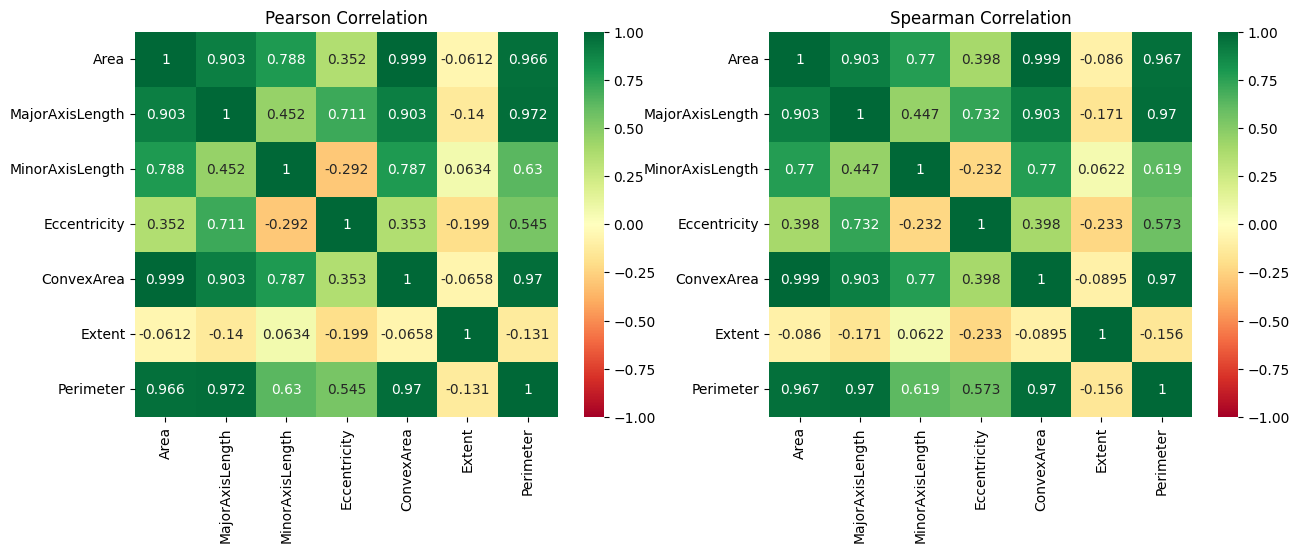

In [30]:
# calc and display correlations
corr_pearson = df[features_num].corr(method='pearson')
corr_spearman = df[features_num].corr(method='spearman')

plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn', 
            fmt='.3g', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')

ax2 = plt.subplot(1,2,2, sharex=ax1)
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn',
            fmt='.3g', vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

## Feature Distributions by Class



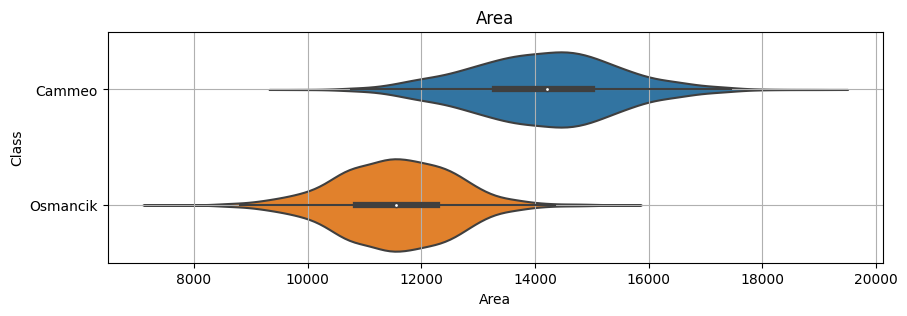

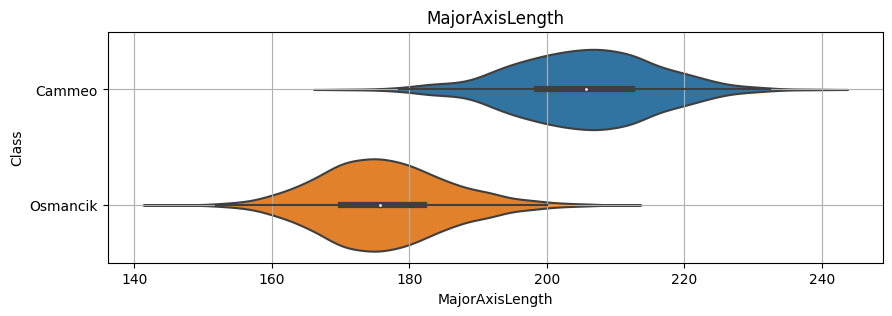

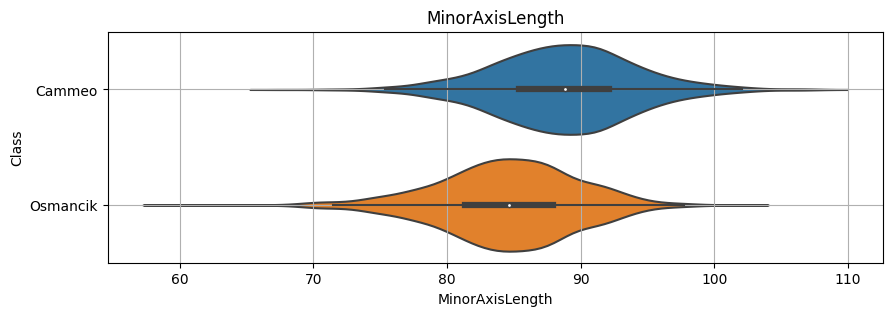

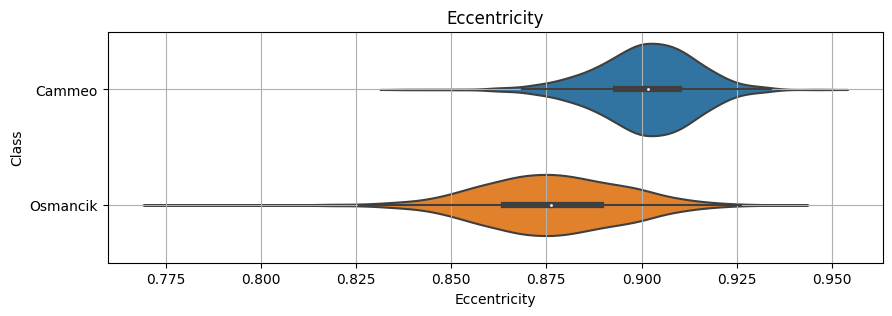

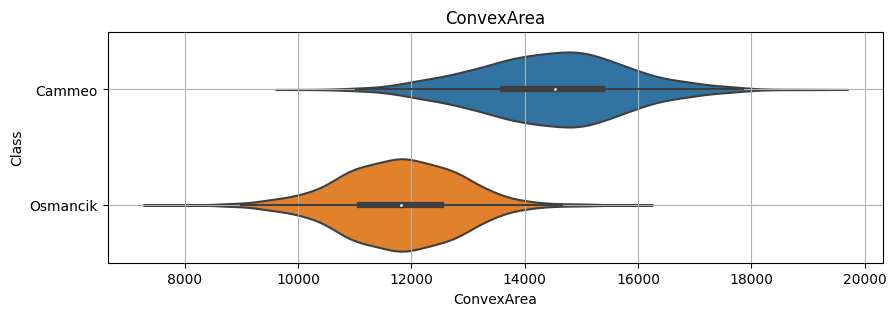

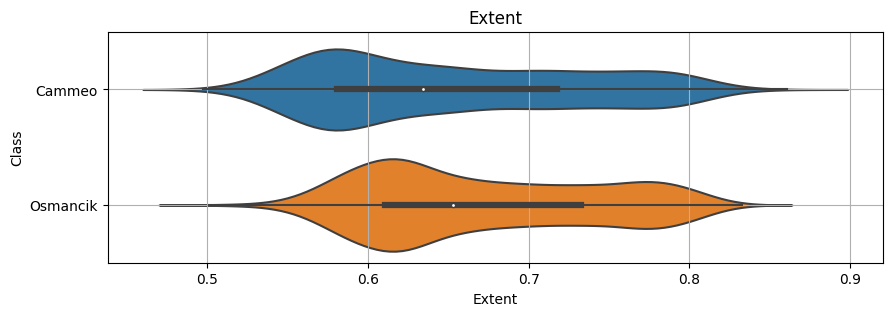

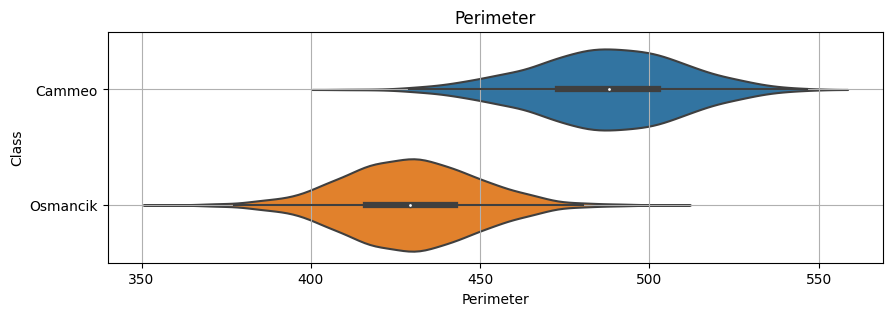

In [34]:
# plot distributions split by class for each feature
for f in features_num:
    plt.figure(figsize=(10,3))
    sns.violinplot(data=df, y='Class', x=f)
    plt.grid()
    plt.title(f)
    plt.show()

## Dimensionality Reduction - PCA

In [35]:
# standardize features
df4pca_std = StandardScaler().fit_transform(df[features_num])
# run PCA
pc_model = PCA(n_components=3)
pc = pc_model.fit_transform(df4pca_std)
# append PCA components to original data frame
df['pc_1'] = pc[:,0]
df['pc_2'] = pc[:,1]
df['pc_3'] = pc[:,2]
# interactive 3D plot - colored by class; size ~ area
fig = px.scatter_3d(df, x='pc_1', y='pc_2', z='pc_3',
                    color=df.Class.astype(str),
                    size=df.Area,
                    hover_data=features_num,
                    opacity=0.35)
fig.update_layout(title='Visualization using PCA dimension reduction')
fig.show()